## Строим эксп. распределение

In [2]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

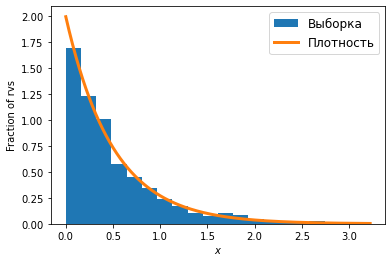

In [3]:
# зададим эксп. распределенную случайную величину
lamb = 2
exp_rv = sts.expon(loc=0, scale=1/lamb)

# строим гистрограмму по выборке размера n=1000
rvs = exp_rv.rvs(size=1000)
plt.hist(rvs, bins = 20, density=True, label='Выборка')  # bins - количество столбцов, density - нормировка

# строим теоретическую плотность
x = np.linspace(np.min(rvs),np.max(rvs),1000)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf, linewidth=3, label='Плотность')

# настройки графика
plt.xlabel('$x$')
plt.ylabel('Fraction of rvs')
plt.legend(prop={'size': 12})
plt.show()

## Приближаем распределение нормальным по ЦПТ

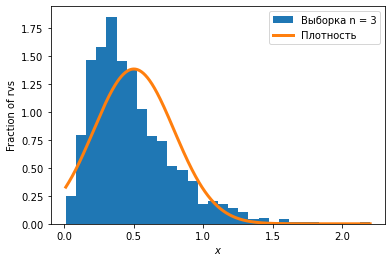

Точность аппроксимации: 0.0%


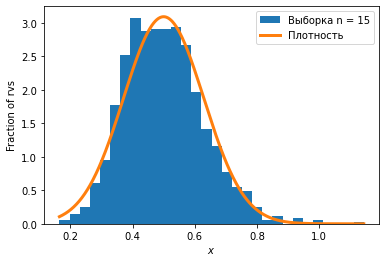

Точность аппроксимации: 14.541%


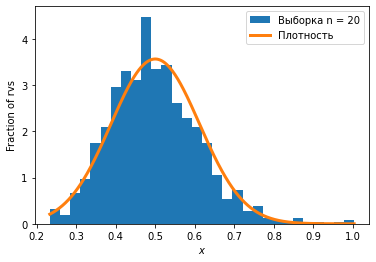

Точность аппроксимации: 6.513%


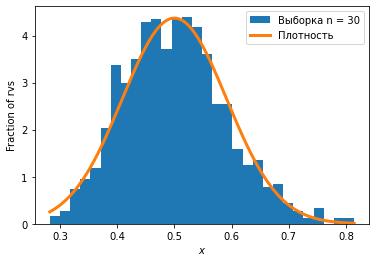

Точность аппроксимации: 33.493%


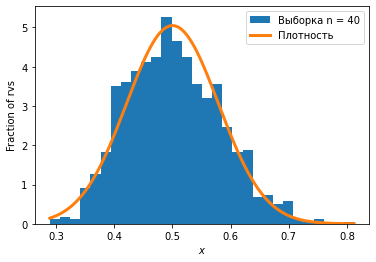

Точность аппроксимации: 28.909%


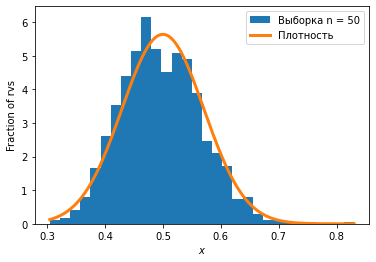

Точность аппроксимации: 15.167%


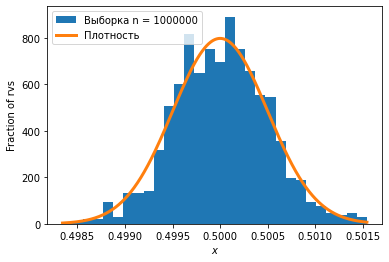

Точность аппроксимации: 80.211%


In [7]:
mu = 1/lamb #матожидание 
sigma = np.sqrt(1/lamb**2) #стандартное отклонение

sizes = [3, 15, 20, 30, 40, 50]  # размеры выборок

for n in sizes:
    avr = []  # здесь будем хранить выборочные средние каждого размера выборки
    for j in range(1000):
        rvs = exp_rv.rvs(size=n)  # из эксп. распределения получили выборку размера n
        avr.append(np.mean(rvs))  # посчитали среднее выборки и добавили его для дальнейшего построения гистограммы
    
    # по средним строим нормированную гистограмму 
    plt.hist(avr, bins = 30, density=True, label=f'Выборка n = {n}') 
    
    # строим плотность нормального распределения по ЦПТ 
    x = np.linspace(np.min(avr), np.max(avr), 1000)
    plt.plot(x, 
             sts.norm.pdf(x, loc=mu,  scale=sigma/np.sqrt(n)), 
             linewidth = 3, 
             label='Плотность')
    
    # настройки графика
    plt.xlabel('$x$')
    plt.ylabel('Fraction of rvs')
    plt.legend(prop={'size': 10})
    plt.show()
    
    print(f"Точность аппроксимации: {round(sts.kstest(avr, 'norm', args=(np.mean(avr), np.std(avr)))[1] * 100, 3)}%")
    

Таким образом, видим подтверждении центральной предельной теоремы на практике: точность приближения экспоненциального распределения нормальным увеличивается с увеличением объёма выборки. 

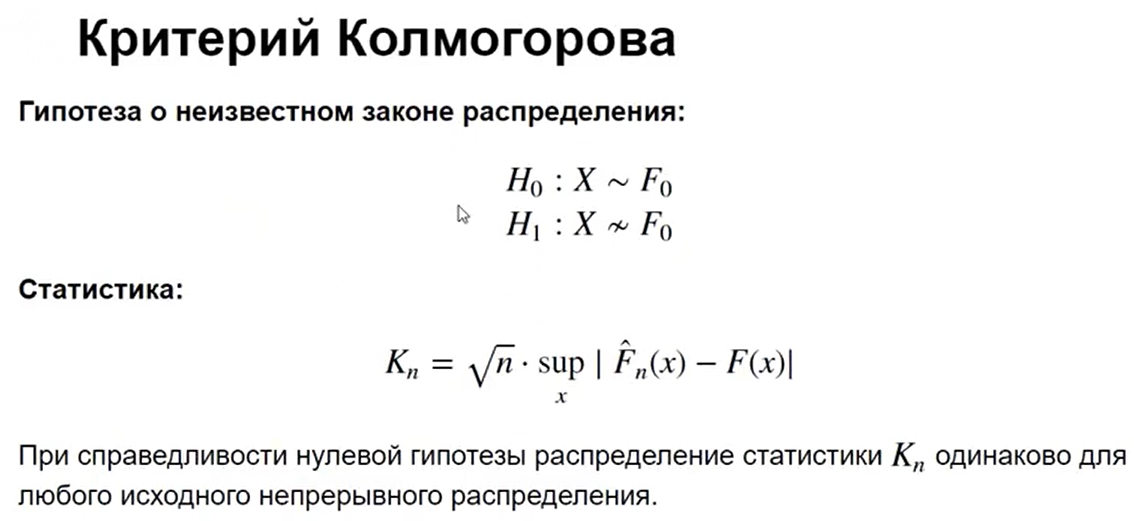